In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/sqtang37/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sqtang37/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sqtang37/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sqtang37/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [5]:
# Load Data
data = pd.read_csv("IMDB Dataset.csv")


Class Distribution:
 positive    25000
negative    25000
Name: sentiment, dtype: int64


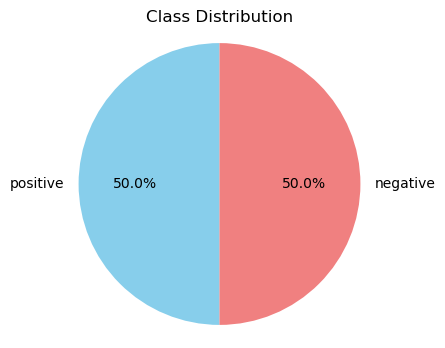

In [6]:
# Descriptive statistics (class distribution)
class_distribution = data['sentiment'].value_counts()
print("\nClass Distribution:\n", class_distribution)

plt.figure(figsize=(4, 4))
class_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors= ['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Data Preprocessing

In [7]:
def preprocess(text):
    # Clean text
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords, personal pronouns, determiners, coordinating conjunctions, and prepositions
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words and word.lower() not in ["he", "she", "i", "we", "the", "a", "an", "another", "for", "and", "nor", "but", "or", "yet", "so", "in", "under", "towards", "before"]]

    # From adv to adj
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='a') for word in words]

    # Join words back into sentence
    processed_text = ' '.join(words)

    return processed_text


In [8]:
data['processed_reviews'] = data['review'].apply(preprocess)
data.head()

,review,sentiment,processed_reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## Word Cloud

In [9]:
# Function to extract adj from text
def extract_adjectives(text):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    adjectives = [word.lower() for word, tag in tagged_words if tag.startswith('JJ')]
    return ' '.join(adjectives)

data['adjective_reviews'] = data['processed_reviews'].apply(extract_adjectives)

# Combine all adj into a string
adjective_text = ' '.join(data['adjective_reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adjective_text)

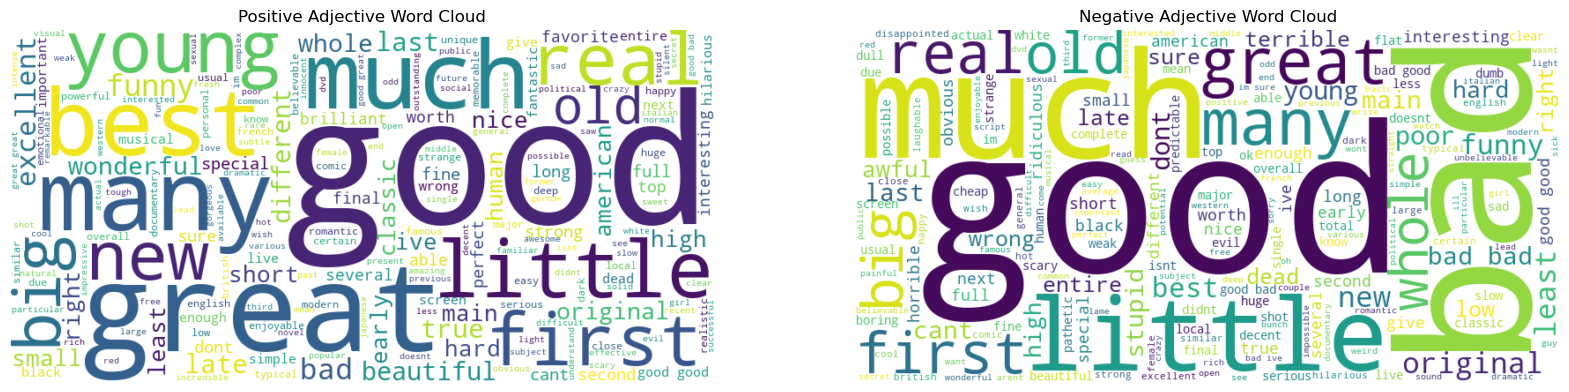

In [10]:
positive_reviews = data[data['sentiment'] == 'positive']['adjective_reviews']
negative_reviews = data[data['sentiment'] == 'negative']['adjective_reviews']

# Combine all adj for each sentiment
positive_adjective_text = ' '.join(positive_reviews)
negative_adjective_text = ' '.join(negative_reviews)

# Word Cloud for positive adj
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_adjective_text)

# Word Cloud for negative adj
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_adjective_text)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Adjective Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Adjective Word Cloud')
plt.axis('off')

plt.show()

# Sentiment Analysis

In [13]:
with open('positive-words.txt', 'r') as file:
    positive_text = file.read()
with open('negative-words.txt', 'r') as file:
    negative_text = file.read()

sentiment_dict = list(set(word_tokenize(positive_text) + word_tokenize(negative_text)))

In [14]:
def filter_words(word_list, training_data):
    # Tokenize training data & create unique words set
    unique_words_set = set(word for text in training_data for word in word_tokenize(text))

    # Filter list based on the unique words
    filtered_words = [word for word in word_list if word in unique_words_set]

    return filtered_words

filtered_word_list = filter_words(sentiment_dict, data['processed_reviews'])
print(filtered_word_list)

['misbehavior', 'lackluster', 'defensive', 'irresistible', 'cracks', 'regression', 'gripe', 'disordered', 'penalty', 'reactionary', 'obstinately', 'soundly', 'haughty', 'merrily', 'mistress', 'violently', 'blatant', 'stains', 'overbalance', 'optimistic', 'infallibility', 'unsafe', 'morality', 'oppression', 'tenacity', 'lapsed', 'mishandle', 'audaciousness', 'cringed', 'unsuspecting', 'stumped', '14th', 'pains', 'ignorance', 'discontented', 'glowing', 'irksomely', 'sneer', 'humiliation', 'racism', 'sucked', 'unwise', 'conceded', 'abundance', 'infiltrator', 'blister', 'anarchy', 'belligerent', 'slick', 'insubstantial', 'celebratory', 'missed', 'instability', 'contortions', 'leak', 'chore', 'disgrace', 'shrug', 'resolute', 'commend', 'humane', 'flawlessly', 'weakness', 'glare', 'leads', 'swipe', 'considerate', 'crisis', 'peace', 'decadent', 'miserably', 'nastily', 'embarrassingly', 'sumptuously', 'smuttier', 'disproportionate', 'derision', 'cruelness', 'rightful', 'reasonably', 'cruelty',

In [15]:
def encode_text_vector(text_vector, word_list):
    # Tokenize input text vector
    tokenized_text = [word_tokenize(text) for text in text_vector]

    # CountVectorizer with given words
    vectorizer = CountVectorizer(vocabulary = word_list, binary=True)

    # Transform tokenized text into binary matrix based on word presence
    encoded_matrix = vectorizer.transform([" ".join(tokens) for tokens in tokenized_text]).toarray()

    return encoded_matrix

encoded_text_matrix = encode_text_vector(data['processed_reviews'], filtered_word_list)

In [16]:
print(encoded_text_matrix.shape)

(50000, 5778)


In [17]:
# Word selection (TF-IDF) & dimension reduction (PCA)
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(encoded_text_matrix)
pca = PCA(n_components=0.8)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

In [18]:
reduced_matrix.shape

(50000, 1392)

# Model Training

In [19]:
X = reduced_matrix
y = data['sentiment'].map({'positive': 1, 'negative': 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
# Function for plotting ROC curves
def plot_roc_curve(fpr, tpr, model_name, auc_score):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (auc = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

Logistic Regression Accuracy: 0.84964
              precision    recall  f1-score   support

           0     0.8605    0.8341    0.8471     12483
           1     0.8395    0.8651    0.8521     12517

    accuracy                         0.8496     25000
   macro avg     0.8500    0.8496    0.8496     25000
weighted avg     0.8500    0.8496    0.8496     25000



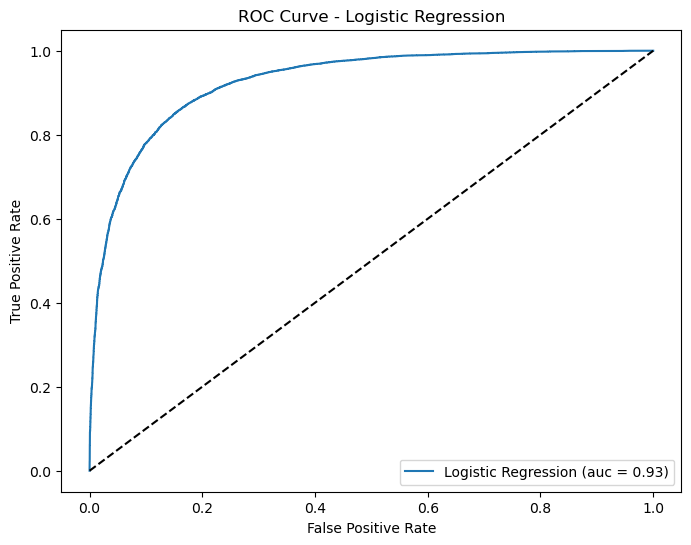

In [21]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
name = 'Logistic Regression'
model.fit(X_train, y_train)

predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=4)
print(f"{name} Accuracy: {test_accuracy}")
print(report)

# ROC Curve
proba_predictions = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)


/Users/sqtang37/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sqtang37/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

Best Parameters:  {'n_neighbors': 77}
KNN Accuracy: 0.64608
Classification Report:
               precision    recall  f1-score   support

           0     0.8577    0.3491    0.4962     12483
           1     0.5921    0.9422    0.7272     12517

    accuracy                         0.6461     25000
   macro avg     0.7249    0.6457    0.6117     25000
weighted avg     0.7247    0.6461    0.6119     25000



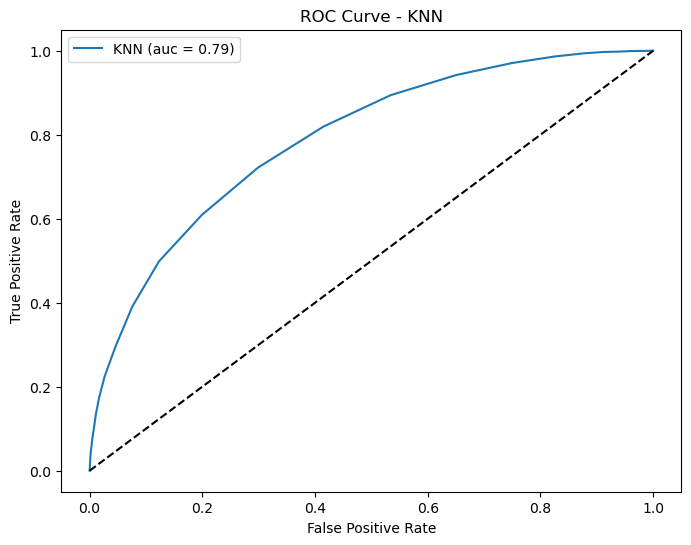

In [22]:
# KNN
name = 'KNN'
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 3, 5, 13, 25, 77, 93, 121]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
test_accuracy = grid_search.score(X_test, y_test)
predictions = grid_search.predict(X_test)
report = classification_report(y_test, predictions, digits=4)
print("Best Parameters: ", grid_search.best_params_)
print(f"{name} Accuracy: {test_accuracy}")
print("Classification Report:\n", report)

# KNN ROC Curve
proba_predictions = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.7914
Classification Report:
               precision    recall  f1-score   support

           0     0.8190    0.7474    0.7816     12483
           1     0.7683    0.8353    0.8004     12517

    accuracy                         0.7914     25000
   macro avg     0.7936    0.7913    0.7910     25000
weighted avg     0.7936    0.7914    0.7910     25000



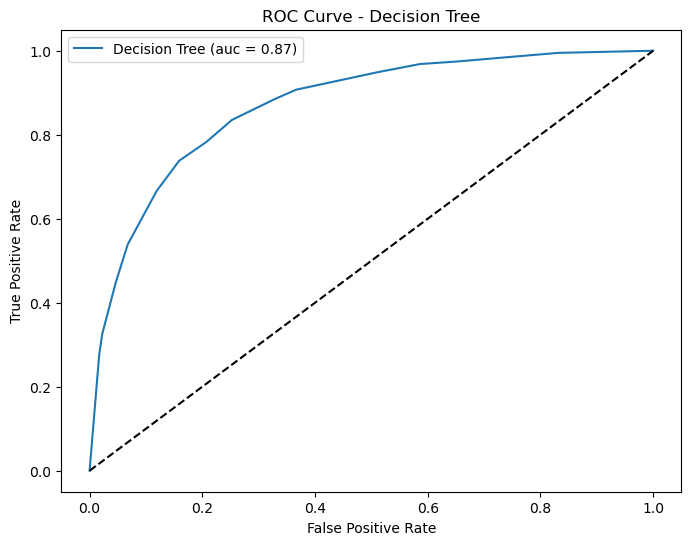

In [27]:
# Decision Tree
name = "Decision Tree"
dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
test_accuracy = grid_search.score(X_test, y_test)
predictions = grid_search.predict(X_test)
report = classification_report(y_test, predictions, digits=4)
print("Best Parameters: ", grid_search.best_params_)
print(f"{name} Accuracy: {test_accuracy}")
print("Classification Report:\n", report)

# DT ROC Curve
proba_predictions = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)

Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.81348
Classification Report:
               precision    recall  f1-score   support

           0     0.8218    0.7999    0.8107     12483
           1     0.8056    0.8270    0.8162     12517

    accuracy                         0.8135     25000
   macro avg     0.8137    0.8135    0.8134     25000
weighted avg     0.8137    0.8135    0.8134     25000



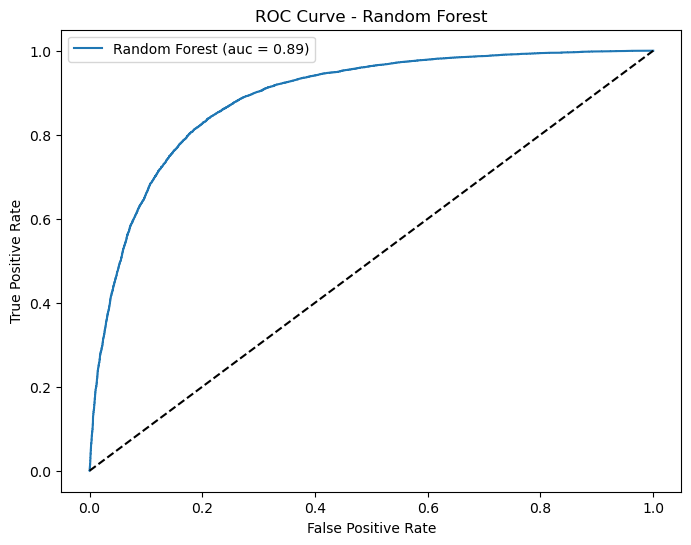

In [23]:
# Random Forest
name = 'Random Forest'
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
test_accuracy = grid_search.score(X_test, y_test)
predictions = grid_search.predict(X_test)
report = classification_report(y_test, predictions, digits=4)
print("Best Parameters: ", grid_search.best_params_)
print(f"{name} Accuracy: {test_accuracy}")
print("Classification Report:\n", report)

# RF ROC Curve
proba_predictions = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)

In [24]:
# LDA: check the assumption on same covariance
classes = np.unique(y)
cov_matrices = []

# Calculate the covariance matrix for each class
for class_val in classes:
    class_data = X[y == class_val]

    if class_data.ndim == 2:
        cov_matrix = np.cov(class_data.T)
        cov_matrices.append(cov_matrix)
        print(f"Covariance Matrix for Class {class_val}:\n{cov_matrix}\n")

# Compare the covariance matrices
n_classes = len(cov_matrices)
for i in range(n_classes):
    for j in range(i+1, n_classes):
        diff = cov_matrices[i] - cov_matrices[j]
        frob_norm = np.linalg.norm(diff, 'fro')  # Frobenius norm
        print(f"Difference between covariance matrices of class {i} and class {j}: {frob_norm}")


Covariance Matrix for Class 0:
[[ 4.65867330e-03  1.30264314e-03 -1.73974290e-04 ...  2.21245559e-06
   6.16485135e-07  4.88990087e-06]
 [ 1.30264314e-03  4.42109657e-03 -4.08456767e-06 ... -5.95860822e-06
   1.48906916e-06  4.70194819e-06]
 [-1.73974290e-04 -4.08456767e-06  3.78099390e-03 ... -8.46168070e-07
   1.68283652e-06 -1.45285099e-06]
 ...
 [ 2.21245559e-06 -5.95860822e-06 -8.46168070e-07 ...  1.68699215e-04
   1.12904906e-06  3.87851211e-06]
 [ 6.16485135e-07  1.48906916e-06  1.68283652e-06 ...  1.12904906e-06
   1.68232938e-04 -1.76125565e-06]
 [ 4.88990087e-06  4.70194819e-06 -1.45285099e-06 ...  3.87851211e-06
  -1.76125565e-06  1.65608334e-04]]

Covariance Matrix for Class 1:
[[ 3.40289890e-03 -9.96891225e-04  3.12443130e-04 ... -2.27704695e-06
  -4.73109640e-06 -3.33190276e-06]
 [-9.96891225e-04  6.22267258e-03 -5.18456164e-06 ...  5.96293198e-06
  -1.21363633e-06 -4.80624086e-06]
 [ 3.12443130e-04 -5.18456164e-06  4.57224270e-03 ...  8.48126212e-07
  -1.55809859e-06  1.

LDA Accuracy: 0.8396
              precision    recall  f1-score   support

           0     0.8525    0.8207    0.8363     12483
           1     0.8276    0.8584    0.8427     12517

    accuracy                         0.8396     25000
   macro avg     0.8401    0.8396    0.8395     25000
weighted avg     0.8401    0.8396    0.8395     25000



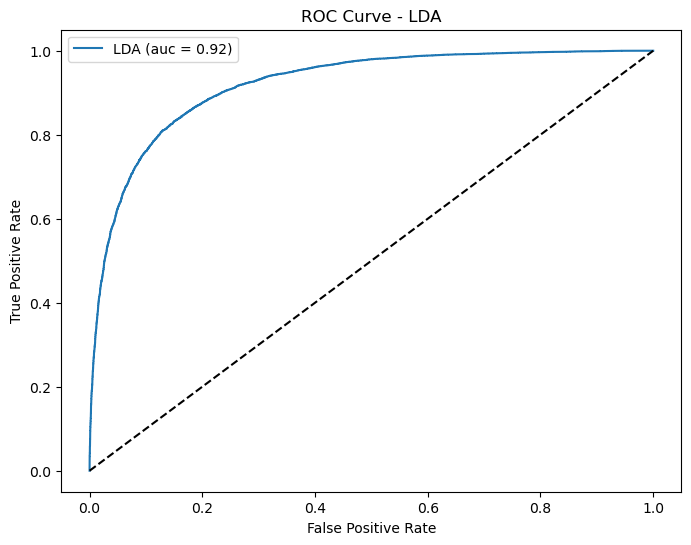

In [25]:
# LDA
model = LinearDiscriminantAnalysis()
name = 'LDA'
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=4)
print(f"{name} Accuracy: {accuracy}")
print(report)

# ROC Curve
proba_predictions = model.predict_proba(X_test)[:, 1]  # Probabilities needed for ROC curve
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)

QDA Accuracy: 0.77896
              precision    recall  f1-score   support

           0     0.7827    0.7715    0.7771     12483
           1     0.7753    0.7864    0.7808     12517

    accuracy                         0.7790     25000
   macro avg     0.7790    0.7789    0.7789     25000
weighted avg     0.7790    0.7790    0.7789     25000



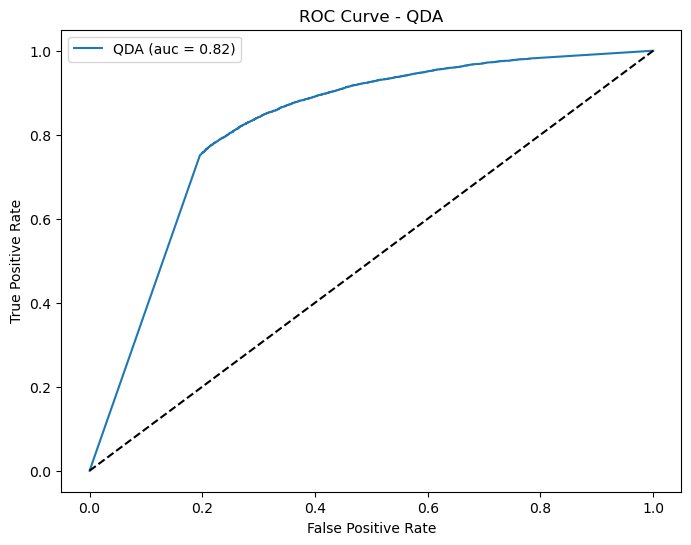

In [26]:
# QDA
model = QuadraticDiscriminantAnalysis()
name = 'QDA'
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=4)
print(f"{name} Accuracy: {accuracy}")
print(report)

# ROC Curve
proba_predictions = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
auc_score = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, name, auc_score)